In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np

import dataset for training 


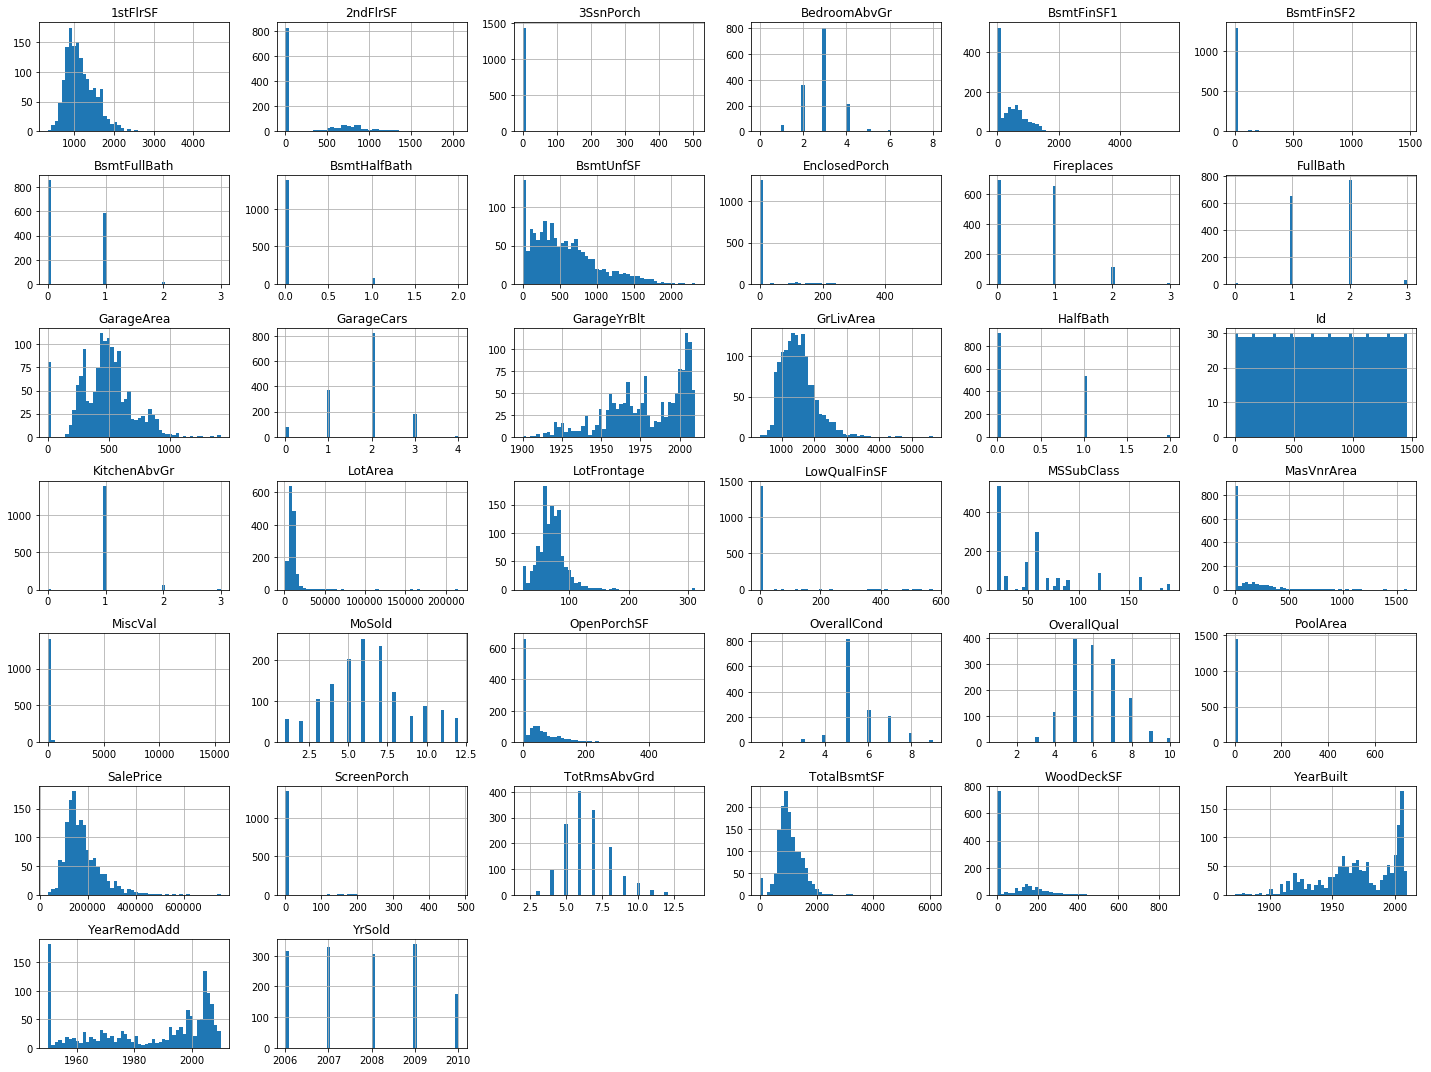

In [2]:
train_file_path = 'input/train.csv'
house_data = pd.read_csv(train_file_path)
house_data.hist(bins = 50, figsize = (20,15))
plt.tight_layout()
plt.show()


In [5]:
# go through all the features, check for those that are not listed on histogram
house_data.info()

# columns to clean
#  object: MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig,LandSlope, Neighborhood,Condition1,Condition2,BldgType, HouseStyle,RoofStyle,RoofMatl,Exterior1st,
#        Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure,BsmtFinType1,BsmtFinType2   
#        Heating, CentralAir, Electrical,KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, PavedDrive 
#        PoolQC, Fence, MiscFeature
#  Missing Data: LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType2,Electrical,FireplaceQu,
#               GarageType,GarageYrBlt,GarageFinish, GarageQual,GarageCond, PoolQC ,Fence, MiscFeature, SaleType, SaleCondition
#  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [ ]:
# write the function to plot objects feature

from collections import Counter

def plot_Objects(X, name):
    letter_counts = Counter(X)
    df = pd.DataFrame.from_dict(letter_counts, orient = 'index')
    df.plot(kind = 'bar', title = name)
    
for _eachFeature in house_data:
    if house_data[_eachFeature].dtype == object:
        plot_Objects(house_data[_eachFeature], _eachFeature)

In [19]:
#input median values for missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
# they are object type, we could drop them for this step
ready_to_encode_arr = ["MSZoning", "Street","LotShape", "LandContour", "Utilities", "LotConfig",
         "LotConfig", "LandSlope", "Neighborhood","Condition1","Condition2","BldgType", "HouseStyle","RoofStyle","RoofMatl","Exterior1st",
       "Exterior2nd","ExterQual", "ExterCond", "Foundation", "BsmtFinType1","Heating", "CentralAir", "KitchenQual", "Functional",  "PavedDrive",
        "Alley","MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType2","HeatingQC","Electrical","FireplaceQu",
        "GarageType","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature","SaleType","SaleCondition"
       ]

#only reserve the numerical features 
house_imput = house_data.drop(ready_to_encode_arr, axis = 1)
imputer.fit(house_imput)
X =imputer.transform(house_imput)
house_train = pd.DataFrame(X, columns = house_imput.columns)
#house_train.info()

#now we have completed numerical data fields in house_train dataframe, we wanna merge it back with the remaining object columns
house_object = pd.DataFrame(house_data, columns = ready_to_encode_arr)

# new this house_new table has all the numerical data field filled, the rest are the same as the original dataset
house_new = pd.concat([house_train,house_object], axis=1)
house_new.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
Id               1460 non-null float64
MSSubClass       1460 non-null float64
LotFrontage      1460 non-null float64
LotArea          1460 non-null float64
OverallQual      1460 non-null float64
OverallCond      1460 non-null float64
YearBuilt        1460 non-null float64
YearRemodAdd     1460 non-null float64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null float64
BsmtFinSF2       1460 non-null float64
BsmtUnfSF        1460 non-null float64
TotalBsmtSF      1460 non-null float64
1stFlrSF         1460 non-null float64
2ndFlrSF         1460 non-null float64
LowQualFinSF     1460 non-null float64
GrLivArea        1460 non-null float64
BsmtFullBath     1460 non-null float64
BsmtHalfBath     1460 non-null float64
FullBath         1460 non-null float64
HalfBath         1460 non-null float64
BedroomAbvGr     1460 non-null float64
KitchenAbvGr     1460 non-null floa

In [50]:
# for non-missing data column, use onehotencoder for object feature
ready_to_encode_arr =["MSZoning", "Street","LotShape", "LandContour", "Utilities", "LotConfig",
         "LotConfig", "LandSlope", "Neighborhood","Condition1","Condition2","BldgType", "HouseStyle","RoofStyle","RoofMatl","Exterior1st",
       "Exterior2nd","ExterQual", "ExterCond", "Foundation", "BsmtFinType1","Heating", "CentralAir", "KitchenQual", "Functional",  "PavedDrive" 
       ]



#for n/a object type, filled in with 0
#house_new = house_new.replace({0 : np.nan})
#use pandas functionality to do one hot encoding to the house_data
house_final = pd.get_dummies(house_new)

#confirm whether there is still null value
house_final.isnull().any()
#house_final.info(verbose=True)


# now all the data should be filled, end of data cleaning process




# sklearn does not seem to work as nice as panda here, commented out
# from sklearn.preprocessing import OneHotEncoder
# def encode_feature(feature_name):
#     encoder = OneHotEncoder()
#     feature_toEncode = house_data[feature_name]
#     encoded_feature, encoded_categories = feature_toEncode.factorize()
#     feature_cat_1hot = encoder.fit_transform(encoded_feature.reshape(-1,1))
    





Id                       False
MSSubClass               False
LotFrontage              False
LotArea                  False
OverallQual              False
OverallCond              False
YearBuilt                False
YearRemodAdd             False
MasVnrArea                True
BsmtFinSF1                True
BsmtFinSF2                True
BsmtUnfSF                 True
TotalBsmtSF               True
1stFlrSF                 False
2ndFlrSF                  True
LowQualFinSF              True
GrLivArea                False
BsmtFullBath              True
BsmtHalfBath              True
FullBath                  True
HalfBath                  True
BedroomAbvGr              True
KitchenAbvGr              True
TotRmsAbvGrd             False
Fireplaces                True
GarageYrBlt              False
GarageCars                True
GarageArea                True
WoodDeckSF                True
OpenPorchSF               True
                         ...  
GarageCond_Fa            False
GarageCo

In [ ]:
#from the plot above, we could clearly remove some "useless" feature for now
house_data.drop(["Street", "Utilities","Alley","Condition2","RoofMatl","Heating", "Functional", "PoolQC", "MiscFeature"], axis = 1)


In [ ]:
# we wanna see the correlation matrix for each feature
corr_matrix = house_data.corr()
corr_matrix["SalePrice"].sort_values(ascending = False)

In [ ]:

#split the data to test and training set

# from sklearn.model_selection import train_test_split
# train_set, test_set = train_test_split (house_data, test_size = 0.2, random_state = 42)

#Standarize the data

def Standarize_data(X):
    mean = X.mean()
    stdev = float(X.std())
    return (X-mean)/stdev
    
for _eachFeature in house_data:
    if house_data[_eachFeature].dtype != object:
        house_data[_eachFeature] = Standarize_data(house_data[_eachFeature])
        
house_data.hist(bins = 50, figsize = (20,15)) 
plt.tight_layout()
plt.show()



now oberserve the data above 
for the baseline, we might wanna discard several extreme features, such as
3ScnPorch, BsmtFinSF2 ...etc

In [ ]:
#we believe sale_price will be an important factor so we wanna clean the data so it will refelct the original shape but at the
#same time being flatter and combined

house_data["cleanSalePrice"] = np.ceil(house_data["SalePrice"]/80000)
house_data["cleanSalePrice"].where(house_data["cleanSalePrice"] <= 4,5.0,inplace = True)

In [ ]:
house_data["cleanSalePrice"].hist(bins = 50, figsize = (8,8))
plt.tight_layout()
plt.show()

In [ ]:
#do stratified sampling based on that sale price
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split (house_data,  house_data["cleanSalePrice"]):
    strat_train_set = house_data.loc[train_index]
    strat_test_set = house_data.loc [test_index]
    
# see the distribution for training set 
strat_test_set["cleanSalePrice"].value_counts()/ len(strat_test_set)

In [ ]:
 # now after the split, drop the cleanSalePrice column so data is in original state, this is SUPER important 
for set_ in (strat_train_set, strat_test_set):
    set_.drop ("cleanSalePrice", axis=1, inplace = True)